In [116]:
import numpy as np
import matplotlib.pyplot as plt


np.random.randn(10)


array([-0.89124604,  0.8254674 ,  0.15589025, -0.41936579,  0.5656051 ,
       -0.20994004,  0.0886166 ,  1.82467019,  0.53585299,  1.24655873])

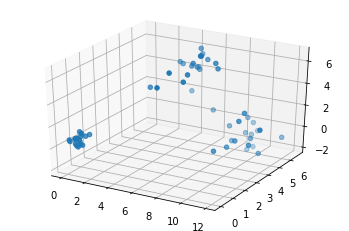

In [117]:
# 데이터 생성
k = 3

points = [np.random.rand(k) for _ in range(20)]
points.extend(np.array([np.random.randn(3) + np.array([5,5,5]) for _ in range(20)]))
points.extend(np.array([np.random.randn(3) + np.array([10,5,0 ]) for _ in range(20)]))
points = np.array(points)



fig = plt.figure()
ax = fig.gca(projection = '3d')

X = points[:,0]
Y = points[:,1]
Z = points[:,2]

ax.scatter(X,Y,Z)
plt.show()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[ 5.13286195  5.12888191  5.11637449]
 [ 0.52086358  0.47164633  0.56695969]
 [ 9.63819313  5.1152341  -0.10032204]]


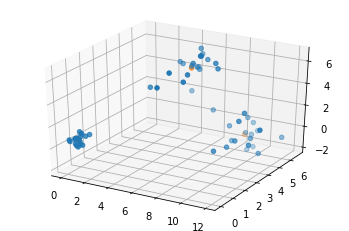

In [118]:
### 사이킷런으로 kmeans 구현

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
kmeans.fit(points)

print(kmeans.labels_)
print(kmeans.cluster_centers_)

centroids = kmeans.cluster_centers_

fig = plt.figure()
ax = fig.gca(projection = '3d')

# X = points[:,0]
# Y = points[:,1]
# Z = points[:,2]

ax.scatter(points[:,0],points[:,1],points[:,2])
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2])

plt.show()

In [119]:
## 직접 구현

def kmeans(points, k, max_iters = 10) :
  """
      return labels, cluster_centers
  
      1. cluster_centers를 랜덤하게 생성한다.
      2. 각각의 점마다 어떤 cluster center와 가장 가까운지 계산, 할당 -> labels 계산
      3. 새로운 labels을 이용해서, 새로운 cluster center 새로 계산
      4. 2~3번 반복하다가... 더이상 업데이트가 없으면 종료
  """
  # 1. cluster_centers를 랜덤하게 생성한다. forgy: 있는 점 중에서 랜덤하게 k개를 골라서 초기 cluster center로 설정
  cluster_centers = points[np.random.choice(n_points, k, replace = False)]


  #4. 
  for iter in range(max_iters)  :
    # 2. 각각의 점마다 어떤 cluster center와 가장 가까운지 계산 및 할당 (a.k.a. labels 계산)
    labels = []
    for p in points :
      min_dist = np.inf
      min_cid = -1
      for cid, c in enumerate(cluster_centers) :
        dist = euclidean_distance(p, c)
        if dist < min_dist :
          min_dist = dist
          min_cid = cid
      labels.append(min_cid)
    labels = np.array(labels)

    # 3. 새로운 labels을 이용해서, 새로운 cluster center 새로 계산
    # 같은 영벡터를 만든다음에 같은 cluster에다가 값들을 더해서
    # 갯수 만큼 나눠준다.

    new_cluster_centers = np.zeros_like(cluster_centers)

    count = [0] * k # count = np.zeros(k)

    # 같은 클러스터에 속한 점들을 평균을 내야한다.
    for l, p in zip(labels, points) :
      new_cluster_centers[l] += p
      count[l] += 1

    for i in range(k) :
      new_cluster_centers[i] /= count[i]

    print("iteration #", iter)

    if np.array_equal(cluster_centers, new_cluster_centers) :
      break
    else :
      cluster_centers = new_cluster_centers
    
  return labels, cluster_centers
  # 4. 2~3번 반복하다가... 더이상 업데이트가 없으면 종료

In [120]:
print(cluster_centers)
print(labels)

[[ 0.3351294   0.69951178  0.4957812 ]
 [ 0.35963857  0.35298465  0.98640244]
 [ 8.67762438  4.76256329  0.49590131]
 [ 0.74547098  0.45247776  0.6267994 ]
 [ 5.36635716  6.65126028  5.35031671]
 [ 9.52432732  6.69924023  0.61682336]
 [10.33556498  4.45806396 -0.77610833]
 [ 0.34083682  0.72336167  0.76834443]
 [ 0.3473845   0.65027199  0.03239127]
 [ 9.43494212  5.74452875 -1.16615672]
 [ 6.50722953  4.57612284  4.26099906]
 [ 7.65167777  5.37253305 -1.10229812]
 [10.81627119  5.76564639  0.33256212]
 [ 9.94329148  4.77791558  0.11273238]
 [ 0.55883533  0.10704222  0.18154328]
 [10.92656321  3.98846696  0.88282613]
 [ 0.17605754  0.19911926  0.65645425]
 [ 5.74195346  4.49057391  6.26575088]
 [ 0.75586827  0.92621028  0.16629061]
 [ 4.04120892  4.46536074  4.8538482 ]]
[ 0  3  8 16  7  3  7  7  1  0  8 18 16  1 14  7 16 18 14  3 17  4 19 10
 10  4 10 17 19  4 19 17  4 10 19 17  4  4 19 17  2 13  2  6 11 12  5  9
 12 12 15  6  9 13  5  2  2 12  2 13]


iteration # 0
iteration # 1
iteration # 2


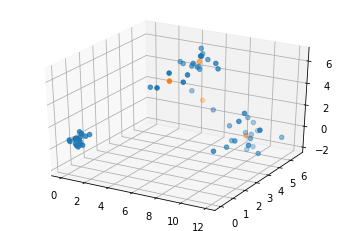

In [121]:
labels, cluster_centers = kmeans(points, 5)


fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(points[:,0],points[:,1],points[:,2])
ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2])

plt.show()

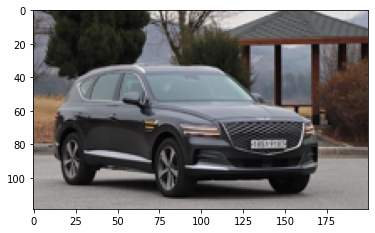

In [122]:
## 사진 불러오기

from PIL import Image

img = Image.open("/content/gv80.JPG")

width = 200
height = img.height * width // img.width
img = img.resize((width, height))


plt.imshow(img)
plt.show()

In [123]:
height*width


23800

In [124]:
pixels = np.array(img).reshape(-1,3).astype(np.float32)


labels, cluster_centers = kmeans(points, 10)

iteration # 0
iteration # 1
iteration # 2
iteration # 3
iteration # 4


In [125]:
for l, i in zip(labels, range(pixels.shape[0])) :
  pixels[i] = cluster_centers[l]

pixels = pixels.astype(np.uint8)
#

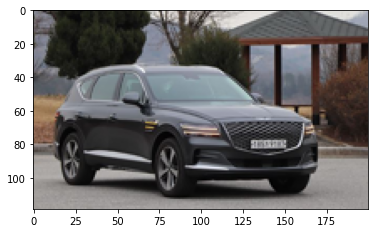

In [126]:
im_remastered = Image.fromarray(pixels.reshape((height, width, 3)), 'RGB')

plt.imshow(im_remastered)
plt.show()

PPT 자료로 해보기

In [127]:
## PPT 자료

#  각 점이 할당될 중심점을 계산
def assign(point, centroids, k):
  return min(range(k), key=lambda i: np.dot(centroids[i]-point, centroids[i]-point))


#  새로운 centroid 계산
def compute_centroids(assignments, points, k):
  vec_sum = [np.zeros(len(points[0])) for _ in range(k)]
  counts = [0] * k
  for i, p in zip(assignments, points):
    vec_sum[i] += p
    counts[i] += 1

  return [vec_sum[i]/counts[i] if counts[i] > 0 else random.choice(points) for i in range(k)]


## kmeans
def kmeans(k, points):
  prev_assignment = []
 # 1. 임의로 k개의 점을 중심점으로 선택 (forgy)
  centroids = points[np.random.choice(points.shape[0], replace=False, size=k)]
  for epoch in range(10):
    # 2. 각 점이 할당될 중심점을 계산
    assignments = [assign(p, centroids, k) for p in points]
    # 3. 새로운 centroid 계산
    centroids = compute_centroids(assignments, points, k)
    # 4. 클러스터에 변화가 없을 경우 종료
    if prev_assignment == assignments:
      break
    prev_assignment = assignments
  return assignments, centroids

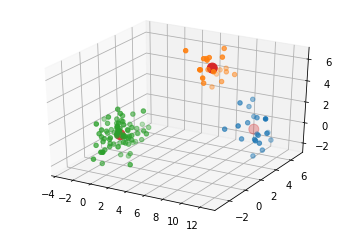

In [128]:
# 데이터 생성
k = 3
points = [np.random.randn(k) for _ in range(80)]
points.extend([np.random.randn(k) + np.array([5, 5, 5]) for _ in range(20)])
points.extend([np.random.randn(k) + np.array([10, 5, 0]) for _ in range(20)])
points = np.array(points)

# kmeans 실행
assignments, centroids = kmeans(k, points)


# 결과 확인
fig = plt.figure()
ax = fig.gca(projection='3d')
clusters = [[] for _ in range(k)]
for a, p in zip(assignments, points):
 clusters[a].append(p)
 
for cluster in clusters:
 ax.scatter(*zip(*cluster))

ax.scatter(*zip(*centroids), s=100)
plt.show()